In [1]:
pip install scikit-learn 

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 


In [9]:
test_df=pd.read_csv(r"C:\Users\asus\Downloads\house-prices-advanced-regression-techniques\test.csv")
train_df=pd.read_csv(r"C:\Users\asus\Downloads\house-prices-advanced-regression-techniques\train.csv")

In [4]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [11]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [12]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [14]:
test_df['LotFrontage']=test_df['LotFrontage'].fillna(test_df['LotFrontage'].median())

In [16]:
train_df['LotFrontage']=train_df['LotFrontage'].fillna(train_df['LotFrontage'].median())

In [18]:
train_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [19]:
test_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64

In [26]:
test_df['SaleType']=test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])

In [27]:
test_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [30]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [31]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [32]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.334476,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,20.569211,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,60.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,78.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [52]:
skewed_features = train_df.skew(numeric_only=True)

In [53]:
skewed_features[skewed_features > 1]

MSSubClass        1.407657
LotFrontage       2.409147
LotArea          12.207688
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
TotalBsmtSF       1.524255
1stFlrSF          1.376757
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtHalfBath      4.103403
KitchenAbvGr      4.488397
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
SalePrice         1.882876
dtype: float64

In [63]:
skewed_cols=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
for col in skewed_cols:
    test_df[col]=np.log1p(test_df[col])
    train_df[col]=np.log1p(train_df[col])

In [65]:

for col in skewed_cols:
    test_df[col]=np.log1p(test_df[col])
    train_df[col]=np.log1p(train_df[col])
    print(f"{col} transformed")

LotFrontage transformed
LotArea transformed
MasVnrArea transformed
BsmtFinSF2 transformed
LowQualFinSF transformed
BsmtHalfBath transformed
KitchenAbvGr transformed
OpenPorchSF transformed
EnclosedPorch transformed
3SsnPorch transformed
ScreenPorch transformed
PoolArea transformed
MiscVal transformed


In [66]:
test_df[skewed_cols].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF2,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,0.263085,0.278029,0.000000,0.304673,0.0,0.0,0.21051,0.000000,0.0,0.0,0.303585,0.0,0.000000
1,0.263152,0.278380,0.264614,0.000000,0.0,0.0,0.21051,0.294556,0.0,0.0,0.000000,0.0,0.320691
2,0.262663,0.278328,0.000000,0.000000,0.0,0.0,0.21051,0.294026,0.0,0.0,0.000000,0.0,0.000000
3,0.262949,0.277760,0.253468,0.000000,0.0,0.0,0.21051,0.294556,0.0,0.0,0.000000,0.0,0.000000
4,0.259388,0.276456,0.000000,0.000000,0.0,0.0,0.21051,0.301109,0.0,0.0,0.304673,0.0,0.000000


In [71]:
#handling missing value
missing_val=test_df.isnull().sum()
missing_val[missing_val > 0].sort_values(ascending=False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
GarageFinish      78
GarageQual        78
GarageCond        78
GarageYrBlt       78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
Functional         2
Utilities          2
BsmtHalfBath       2
Exterior2nd        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior1st        1
TotalBsmtSF        1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64

In [79]:
test_df.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'],axis=1,inplace=True,errors='ignore')

In [82]:
skewed_feat=test_df.skew(numeric_only=True)

In [83]:
skewed_feat[ skewed_feat > 1 ]

MSSubClass        1.346690
BsmtFinSF1        1.165677
BsmtFinSF2        2.293318
1stFlrSF          1.558195
LowQualFinSF     10.073566
GrLivArea         1.130402
BsmtHalfBath      3.575192
WoodDeckSF        2.130760
EnclosedPorch     1.740857
3SsnPorch        10.463281
ScreenPorch       2.746687
PoolArea         15.515130
MiscVal           5.070281
dtype: float64

Text(0.5, 1.0, 'Sales Price Distribution')

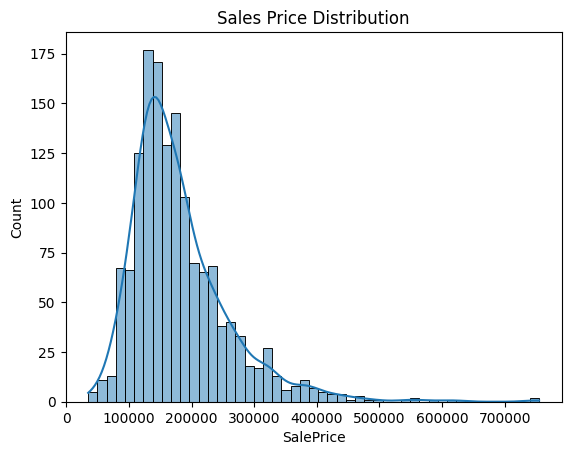

In [85]:
#Traget varibale
sns.histplot(train_df['SalePrice'],kde=True)
plt.title("Sales Price Distribution")
             

In [94]:
#Feature selection

features=['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','1stFlrSF','TotalBsmtSF']
X=train_df[features]
Y=train_df['SalePrice']
print(X.head())
print(Y.head())

   OverallQual  GrLivArea  GarageCars  TotalBsmtSF  1stFlrSF  TotalBsmtSF
0            7       1710           2          856       856          856
1            6       1262           2         1262      1262         1262
2            7       1786           2          920       920          920
3            7       1717           3          756       961          756
4            8       2198           3         1145      1145         1145
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


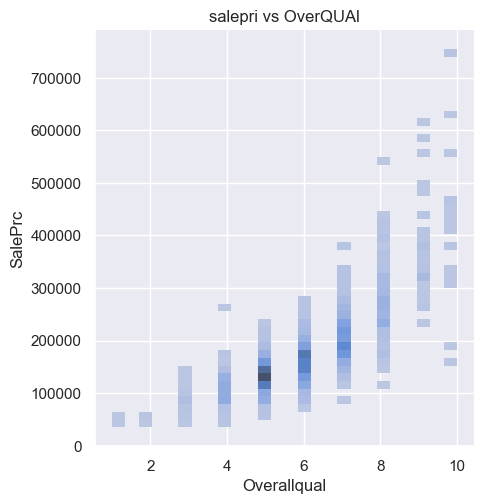

In [118]:
#SalesPrice vs overall quality
sns.set_theme(style='darkgrid')
sns.displot(x='OverallQual',y='SalePrice',data=train_df)
plt.title("salepri vs OverQUAl")
plt.xlabel("Overallqual")
plt.ylabel("SalePrc")
plt.show()

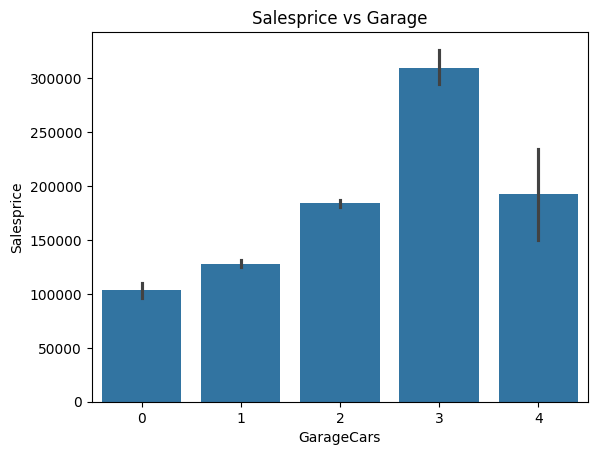

In [115]:
#Salesprice vs GarageCars
sns.barplot(x='GarageCars', y='SalePrice',data=train_df)
plt.title("Salesprice vs Garage")
plt.xlabel("GarageCars")
plt.ylabel("Salesprice")
plt.show()

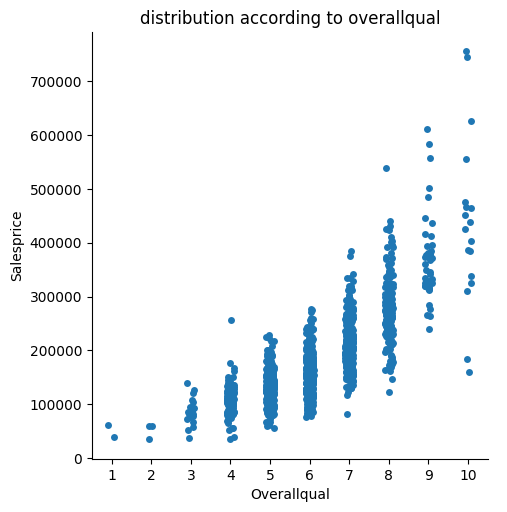

In [113]:
#sales price vs overallquality
sns.catplot(x='OverallQual',y='SalePrice',data=train_df)
plt.title("distribution according to overallqual")
plt.xlabel("Overallqual")
plt.ylabel("Salesprice")
plt.show()

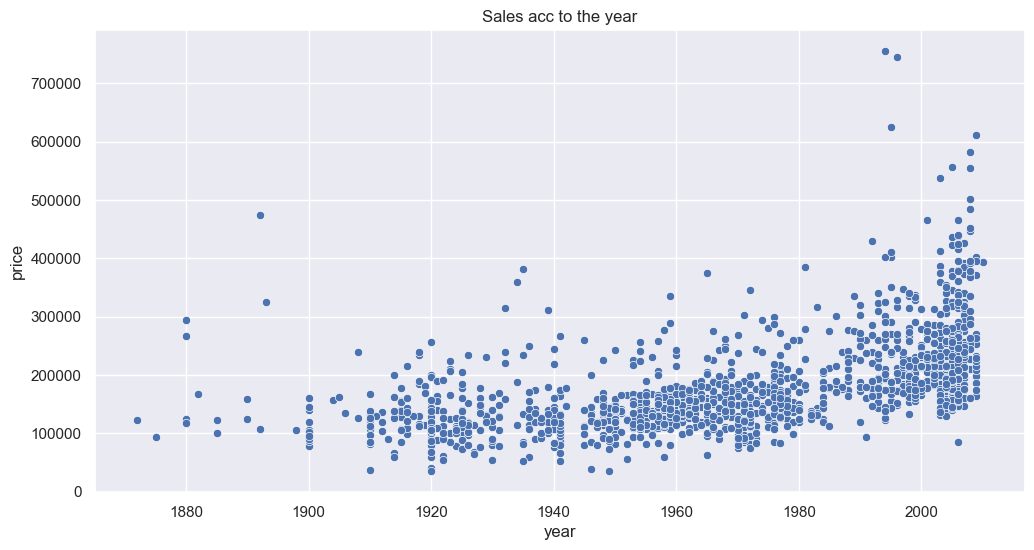

In [122]:
#Slaeprice vs Yearbuilt
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
sns.scatterplot(x='YearBuilt',y='SalePrice',data=train_df)
plt.title("Sales acc to the year")
plt.xlabel('year')
plt.ylabel('price')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_21432\3248285550.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= neigh_pri.index ,y=neigh_pri.values ,palette='viridis')


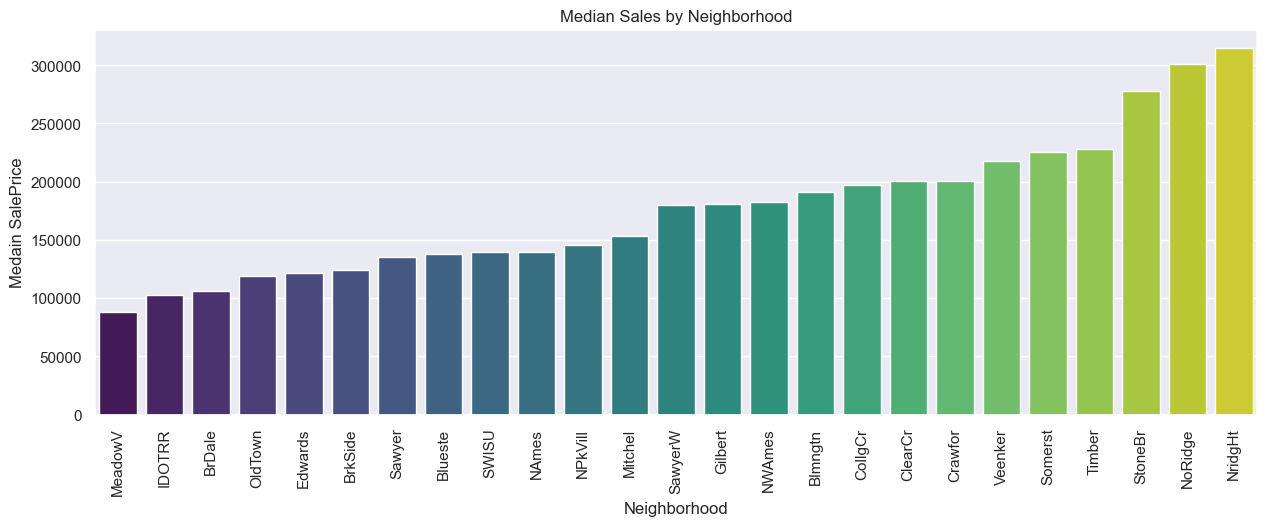

In [125]:
#neighb vs median saleprice
plt.figure(figsize=(15,5))
neigh_pri= train_df.groupby('Neighborhood')['SalePrice'].median().sort_values()
sns.barplot(x= neigh_pri.index ,y=neigh_pri.values ,palette='viridis')
plt.xticks(rotation=90)
plt.title("Median Sales by Neighborhood")
plt.ylabel("Medain SalePrice")
plt.xlabel("Neighborhood")
plt.show()


In [2]:
plt.figure(figsize=(12, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

NameError: name 'plt' is not defined

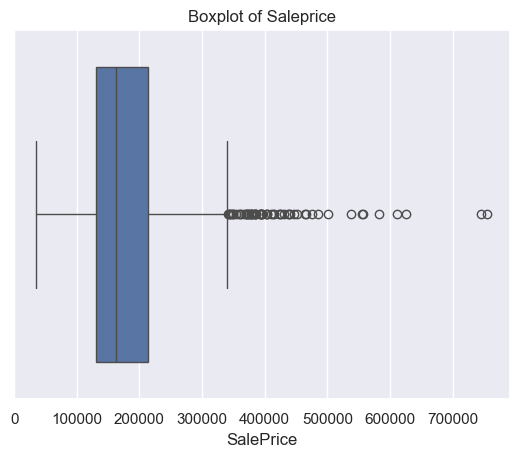

In [127]:
sns.boxplot(x=train_df['SalePrice'])
plt.title("Boxplot of Saleprice")
plt.show()

In [137]:
Q1=train_df['SalePrice'].quantile(0.25)
Q3=train_df['SalePrice'].quantile(0.75)
IQR=Q3-Q1

lower_bound= Q1-1.5 * IQR
Upper_bound= Q3 +1.5 * IQR

outliers=train_df[(train_df['SalePrice']< lower_bound) | (train_df['SalePrice']> Upper_bound)]
print(f"Number of outlier in saleprice: {len(outliers)}")

Number of outlier in saleprice: 61


In [139]:

train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

In [1]:
sns.histplot(train_df['SalePrice'],kde=True,color='Orange')
plt.title("Log Transformed Sale Distribution")
plt
    .xlabel('log(SalePrice)')
plt.show()

IndentationError: unexpected indent (1982835784.py, line 4)

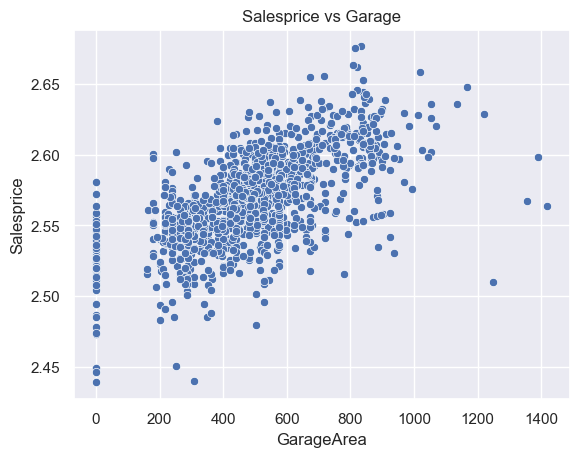

In [148]:
sns.scatterplot(x='GarageArea', y='SalePrice',data=train_df)
plt.title("Salesprice vs Garage")
plt.xlabel("GarageArea")
plt.ylabel("Salesprice")
plt.show()

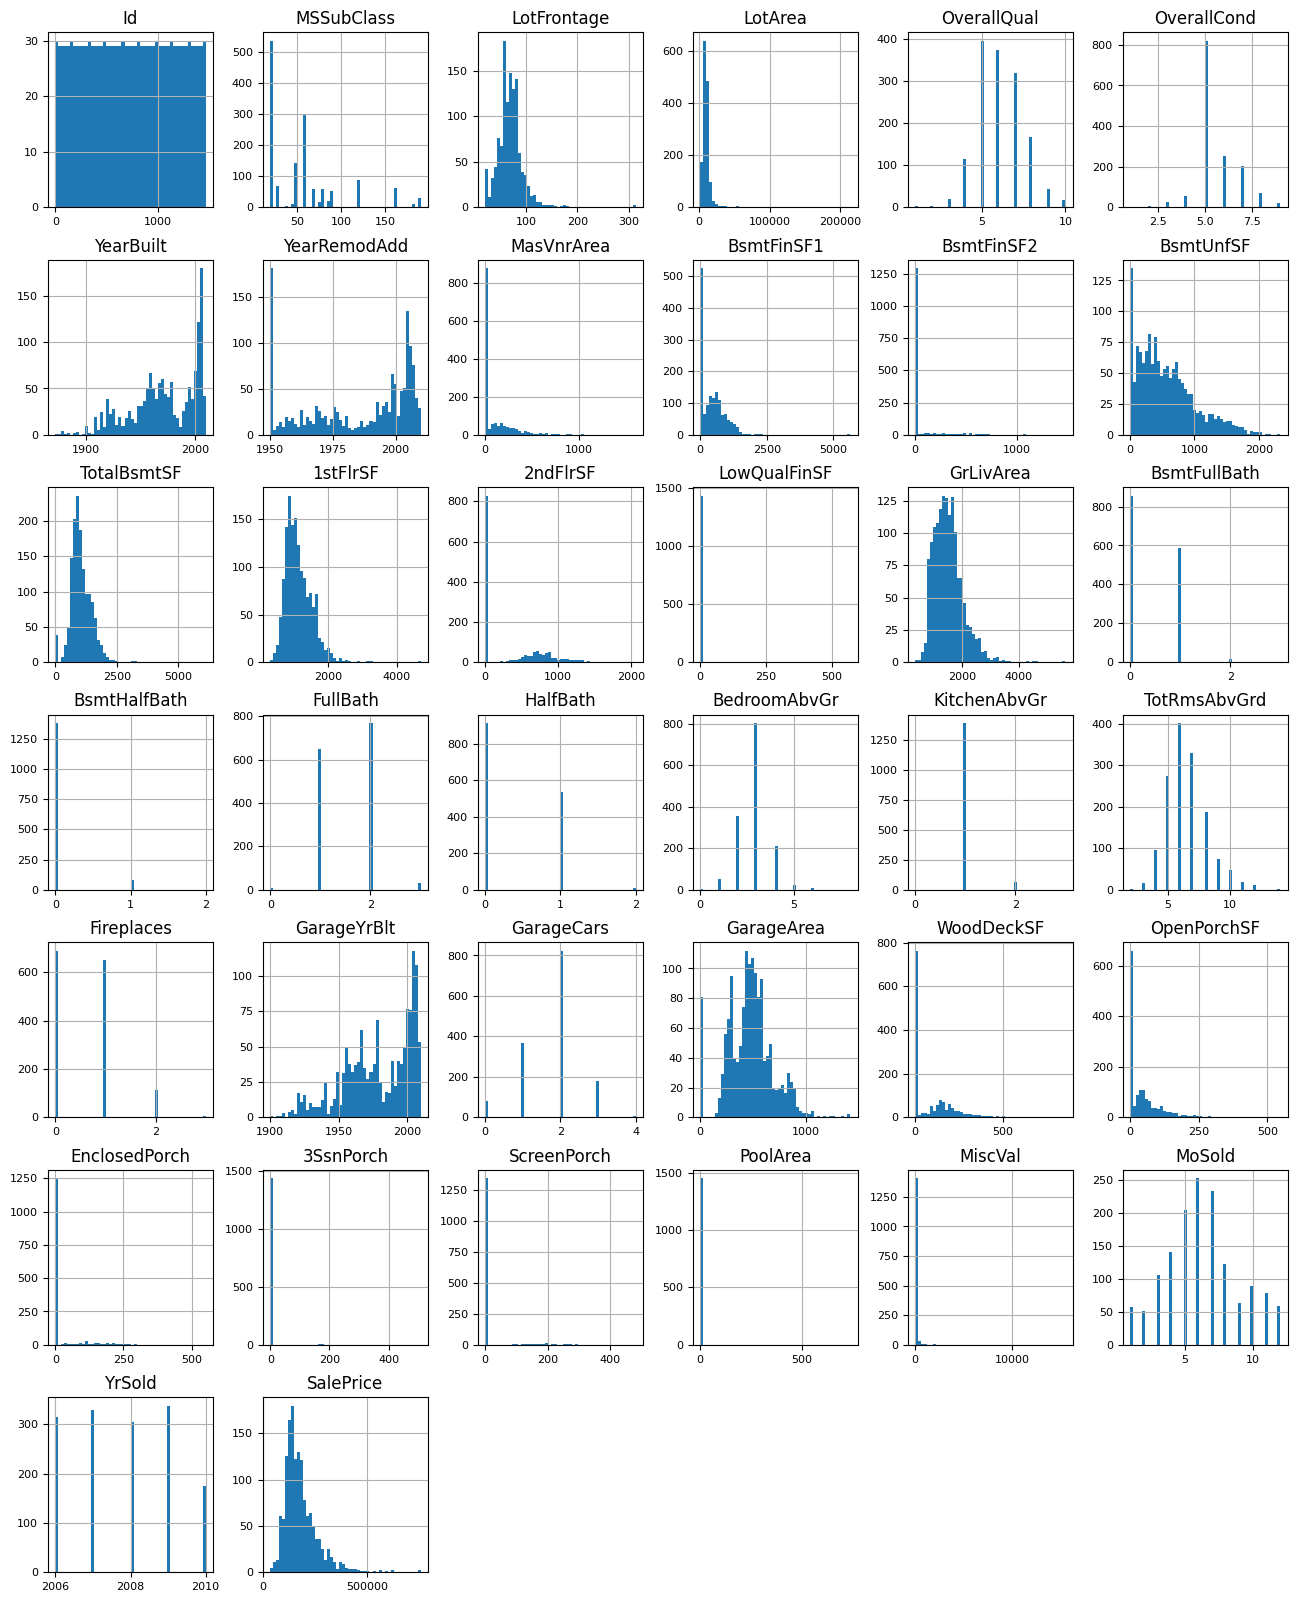

In [10]:
train_df.select_dtypes(include='number').hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [15]:
import os
print(os.getcwd())

C:\Users\asus\Downloads


In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [17]:
test_df=pd.read_csv(r"C:\Users\asus\Downloads\house-prices-advanced-regression-techniques\test.csv")
train_df=pd.read_csv(r"C:\Users\asus\Downloads\house-prices-advanced-regression-techniques\train.csv")

In [18]:
X_train = train_df[["GrLivArea"]]
y_train = train_df["SalePrice"]

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
print("Model trained successfully.")

Model trained successfully.


In [20]:
X_test = test_df[["GrLivArea"]]
predictions = model.predict(X_test)

In [21]:
print(predictions[:5])

[114557.82748987 160945.27292207 193084.38061182 190406.12163767
 155695.88533274]


In [22]:
print(train_df.columns)
print(train_df["GrLivArea"].isnull().sum())

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [23]:
submission = pd.DataFrame({
    "Id": test_df["Id"],        
    "SalePrice": predictions 
})

In [24]:
submission.to_csv("submission.csv", index=False)

In [3]:
import os
print(os.listdir())

[' assignment', ' module 4', '.ipynb_checkpoints', '10th deepa marksheet.pdf', '12th marksheet deepa (1).pdf', '12th marksheet deepa.pdf', '1b.Data Understanding assignment .docx', '6.SQL Module Indexes, SQL SubQuery, Joins and Views.zip', 'Anaconda3-2024.10-1-Windows-x86_64.exe', 'Append_Example.xlsx', 'archive.zip', 'ASSIGNMEMT PBIX.pbix', 'assignment 1.pbix', 'ASSIGNMENT.docx MODULA 3.docx', 'assignment.pbix', 'Assignment_Datasets (1).zip', 'Assignment_Datasets (2).zip', 'ASSINMENT.DOCX.MODULE4.sql', 'Certificate.pdf', 'coffee chain sales performance dashboard.pbix', 'coffee_chain.cleaned.csv', 'coffee_chain.db1.py', 'Customer.csv', 'data ana Q&A.pdf', 'Data Preprocessing Steps[notes].pdf', 'Data Sets (1).zip', 'Data Sets (2).zip', 'Data Sets (3).zip', 'Data Sets.zip', 'Dataset (1).zip', 'Dataset (2).zip', 'Dataset (3).zip', 'Dataset (4).zip', 'Dataset (5).zip', 'Dataset (6).zip', 'Dataset (7).zip', 'Dataset for Sessions', 'Dataset.zip', 'Datasets (1).zip', 'Datasets (2).zip', 'Data

In [ ]:
CONCLUSION:

1. sales-price are right skewed  meaning most homes are moderately priced with a very expensive one. 
    we applied log transformation to make it more normally distributed
2.Neighborhood significantly affects the house prices.some areas (like stonebar, noridge) have higher median prices , suggesting location plays a key role
3.Garage size, garage cars, and year built also show strong positive relationships with price.
4. overallquality ratings like(10,9,8) has also plays a key role in saleprice
5. Homes built in the year 2000 have shown notably higher sale prices, 